#Mega Case Study - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [0]:
!pip install MiniSom

## Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values

## Feature Scaling


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)
print(X)

[[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]


##Training the SOM


In [5]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


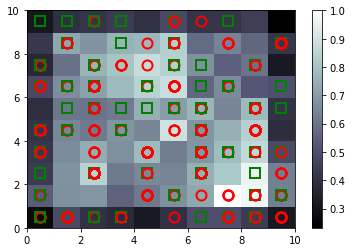

In [14]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5, w[1]+0.5, markers[y[i]], 
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None', 
         markersize = 10,
         markeredgewidth = 2
        )

## Finding the frauds


##Printing the Fraunch Clients

In [7]:
mappings = som.win_map(X)
mappings

defaultdict(list,
            {(2,
              6): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
                     0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.30921519, 1.        , 0.44240602, 0.17857143, 0.5       ,
                     0.15384615, 0.5       , 0.07894737, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.0705    , 0.        ]), array([0.57477506, 1.        , 0.14030075, 0.08928571, 0.5       ,
                     0.        , 0.        , 0.00298246, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.04208   ]), array([5.45275078e-01, 1.00000000e+00, 5.26315789e-02, 1.07142857e-01,
                     5.00000000e-01, 2.30769231e-01, 3.75000000e-01, 1.40350877e-03,
                     0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
            

In [21]:
frauds = np.concatenate((mappings[(8,1)], mappings[(5,6)], mappings[(2,2)]), axis = 0)
frauds

array([[9.72846566e-01, 0.00000000e+00, 4.84962406e-01, 1.42857143e-01,
        5.00000000e-01, 3.07692308e-01, 2.50000000e-01, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 5.00000000e-02, 9.60000000e-03],
       [7.66727132e-01, 0.00000000e+00, 1.06466165e-01, 1.07142857e-01,
        5.00000000e-01, 3.84615385e-01, 3.75000000e-01, 1.40350877e-03,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [9.06554705e-01, 0.00000000e+00, 3.03308271e-01, 5.66071429e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 1.60000000e-01, 0.00000000e+00],
       [9.90986229e-01, 0.00000000e+00, 1.67969925e-01, 4.46428571e-02,
        5.00000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+0

In [22]:
frauds.shape

(39, 15)

In [33]:
frauds = sc.inverse_transform(frauds)
frauds

array([[1.5808662e+07, 0.0000000e+00, 4.6000000e+01, 4.0000000e+00,
        2.0000000e+00, 5.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.0000000e+02, 9.6100000e+02],
       [1.5757188e+07, 0.0000000e+00, 2.0830000e+01, 3.0000000e+00,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 4.0000000e-02,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.0000000e+02, 1.0000000e+00],
       [1.5792107e+07, 0.0000000e+00, 3.3920000e+01, 1.5850000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 3.2000000e+02, 1.0000000e+00],
       [1.5813192e+07, 0.0000000e+00, 2.4920000e+01, 1.2500000e+00,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,

#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [39]:
customers = dataset.iloc[:,1:-1].values

In [40]:
print(customers)

[[1.000e+00 2.208e+01 1.146e+01 ... 2.000e+00 1.000e+02 1.213e+03]
 [0.000e+00 2.267e+01 7.000e+00 ... 2.000e+00 1.600e+02 1.000e+00]
 [0.000e+00 2.958e+01 1.750e+00 ... 2.000e+00 2.800e+02 1.000e+00]
 ...
 [0.000e+00 1.883e+01 9.540e+00 ... 2.000e+00 1.000e+02 1.000e+00]
 [0.000e+00 2.742e+01 1.450e+01 ... 2.000e+00 1.200e+02 1.200e+01]
 [1.000e+00 4.100e+01 4.000e-02 ... 1.000e+00 5.600e+02 1.000e+00]]


In [41]:
customers.shape

(690, 14)

## Create Dependent Variable

In [34]:
is_fraud = np.zeros(len(dataset))
is_fraud.shape

(690,)

In [35]:
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

In [36]:
is_fraud

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [44]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

## Initializing the ANN

In [45]:
ann = Sequential()

##Adding the input layer and the first hidden layer

In [46]:
ann.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim=14))

## Adding the output layer

In [47]:
ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

## Compiling the ANN

In [48]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN

In [50]:
ann.fit(customers, is_fraud, batch_size = 1, epochs= 2)

Epoch 1/2
690/690 [==============================] - 3s 2ms/step - loss: 0.4905 - accuracy: 0.9435
Epoch 2/2
690/690 [==============================] - 1s 2ms/step - loss: 0.2022 - accuracy: 0.9435


## Predicting test set results

In [53]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:,0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:,1].argsort()]
y_pred

array([[1.57403560e+07, 1.16305929e-02],
       [1.55975360e+07, 1.21754967e-02],
       [1.57997850e+07, 1.23595530e-02],
       ...,
       [1.56417330e+07, 3.32450867e-01],
       [1.56232100e+07, 3.47863644e-01],
       [1.56546250e+07, 3.48514199e-01]])

In [63]:
y_pred[:,-1]

array([0.01163059, 0.0121755 , 0.01235955, 0.01261183, 0.01306267,
       0.01336451, 0.01346644, 0.01349688, 0.01368804, 0.013902  ,
       0.01455583, 0.01481288, 0.01490667, 0.01493598, 0.01523168,
       0.015517  , 0.01580871, 0.01594111, 0.01618473, 0.01670753,
       0.01679657, 0.01703236, 0.01704375, 0.01787614, 0.01807872,
       0.01813021, 0.01825967, 0.01847393, 0.01878532, 0.01879668,
       0.01893632, 0.01897429, 0.01952512, 0.01955905, 0.01956858,
       0.01964388, 0.0198661 , 0.02049161, 0.02072169, 0.0207944 ,
       0.02132002, 0.02158876, 0.02162656, 0.02179181, 0.02179436,
       0.02182776, 0.02200986, 0.02202938, 0.02212295, 0.02218832,
       0.02228467, 0.02264031, 0.02286499, 0.02297959, 0.02305157,
       0.0230582 , 0.02308902, 0.02311316, 0.02317123, 0.02319732,
       0.02320629, 0.02325472, 0.02330988, 0.02348034, 0.02357337,
       0.02365734, 0.02393126, 0.02409292, 0.02417599, 0.02424574,
       0.02443472, 0.02459635, 0.02477543, 0.02481263, 0.02483

In [65]:
y_pred[1:]

array([[1.55975360e+07, 1.21754967e-02],
       [1.57997850e+07, 1.23595530e-02],
       [1.57779940e+07, 1.26118315e-02],
       ...,
       [1.56417330e+07, 3.32450867e-01],
       [1.56232100e+07, 3.47863644e-01],
       [1.56546250e+07, 3.48514199e-01]])